In [100]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

digits = datasets.load_digits()

# Classificaion

In [101]:
from sklearn.model_selection import train_test_split
import numpy as np

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

accuracy_list = []

## KNN

0.9833333333333333
0.9805555555555555
0.9916666666666667
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9861111111111112
0.9861111111111112
0.9861111111111112
0.9833333333333333
0.9833333333333333
Most accurate K-value: 0.9916666666666667 (n=3)


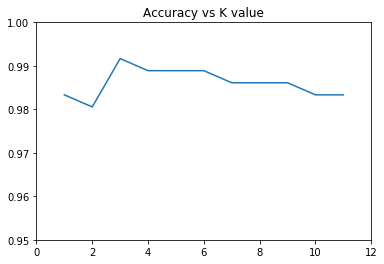

In [102]:
from sklearn.neighbors import KNeighborsClassifier

k_scores = []
top = 0
top_n = 0

for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors = i)

    knn.fit(x_train,y_train)

    k_scores.append(knn.score(x_test, y_test))
    
    print(k_scores[i-1])
    if(k_scores[i-1] > top):
        top = k_scores[i-1]
        top_n = i
    
plt.plot(range(1,12), k_scores)
plt.axis([0, 12, 0.95, 1])
plt.title("Accuracy vs K value")

accuracy_list.append(top)

print("Most accurate K-value: "+str(top)+" (n="+str(top_n)+")")


> Best accuracy produced when the K-value is 3

## Support Vector Machine

In [103]:
from sklearn.svm import SVC


kernels = ['linear', 'poly', 'sigmoid']
prediction = []
for k in kernels:
    clf = SVC(degree=3, kernel=k)
    clf.fit(x_train, y_train)
    prediction.append([k, clf.predict(x_test)])

top = 0
top_c = ''

models = [] 

for c, models in prediction:
    
    score = (y_test == models).sum() / len(y_test)
    print(score)
    if top < score:
        top_c = c
        top = score
        
accuracy_list.append(top)

print('Best kernel for this use = ', str(top_c)+" ("+str(top)+")")

C:\Users\Pube\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pube\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9722222222222222
0.9888888888888889
0.07777777777777778
Best kernel for this use =  poly (0.9888888888888889)


In [104]:
from sklearn.metrics import classification_report

for c, model in prediction:
    print(c+"\n")
    print(classification_report(predicted_model, y_test))

linear

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.13      0.24       360
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.13       360
   macro avg       0.10      0.01      0.02       360
weighted avg       1.00      0.13      0.24       360

poly

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.13      0.24       360
           2       0.00      0.00      0.00         0
          

C:\Users\Pube\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Naive Bayes

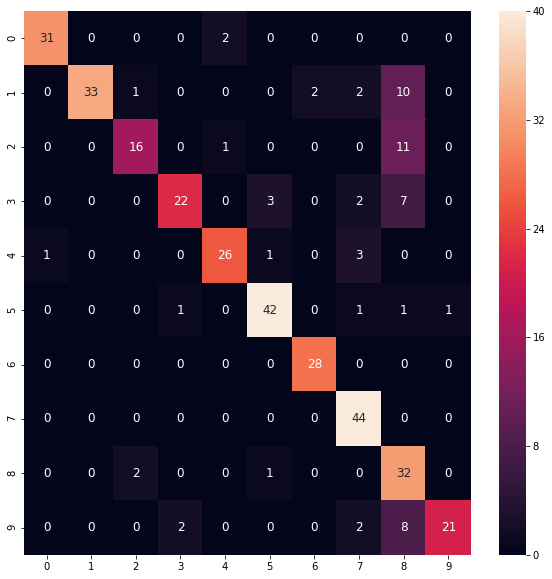

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

cm = confusion_matrix(y_test, y_pred)

top = (y_test == y_pred).sum()/len(y_test)

accuracy_list.append(top)

import seaborn as sn
from sklearn.metrics import confusion_matrix

plt.figure(figsize = cm.shape)
y_pred = np.asarray(y_pred)

cm = confusion_matrix(y_test, y_pred, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
sn.heatmap(cm, annot = True, annot_kws={"size": 12}, vmin = 0, vmax = 40)



[0.9916666666666667, 0.9888888888888889, 0.8194444444444444]


Text(0, 0.5, 'Accuracy')

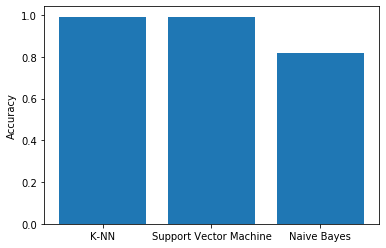

In [106]:
classifier_names = ['K-NN', 'Support Vector Machine', 'Naive Bayes']
print(accuracy_list)
plt.bar(classifier_names, accuracy_list)
plt.ylabel('Accuracy')

# Regression

## Linear Regression

In [107]:
import seaborn as sns
data = pd.read_csv('gapminder.csv')

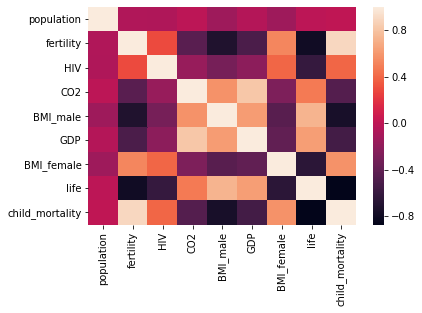

In [108]:
sns.heatmap(data.corr())

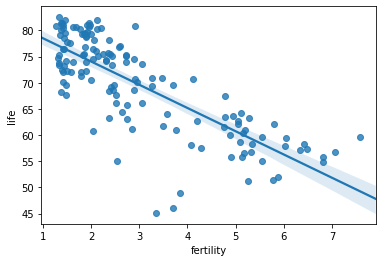

In [109]:
sns.regplot(x="fertility", y="life", data=data)

In [111]:
#x = 'fertility'
#y = ['population' 'HIV', 'BMI_male', 'BMI_female', 'life', 'child_mortality', 'CO2']

#sns.regplot(x, y, data=data)

In [113]:


crossval_x = data[:150]
crossval_y = data[]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, crossval_x, crossval_y, cv=3))

C:\Users\Pube\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'Europe & Central Asia'

## Logistic Regression

In [83]:
df = pd.read_csv('creditcard.csv')

In [84]:
fraud = df.loc[df['Class'] == 1]
norm = df.loc[df['Class'] == 0]

print("Normal Transactions: "+str(len(norm)))
print("Fraudulent Transactions: "+str(len(fraud)))

Normal Transactions: 284315
Fraudulent Transactions: 492


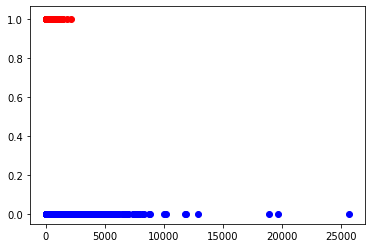

Red = Fraudulent Transactions
Blue = Normal Transactions


In [96]:
plt.scatter(x='Amount',y='Class',data=fraud,color='red')
plt.scatter(x='Amount',y='Class',data=norm,color='blue')
plt.show()
print("Red = Fraudulent Transactions\nBlue = Normal Transactions")

Conclusion: Frauulent transactions are much more likely to be smaller in amount (<=~4000)

In [97]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Pube\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)